In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/clean_titanic.csv")
df.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [11]:
df.isna()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2202,False,False,False,False,False,False,True,True,False
2203,False,False,False,False,False,False,True,True,False
2204,False,False,False,False,False,False,True,True,False
2205,False,False,False,False,False,False,True,True,False


In [13]:
df.dtypes

name         object
gender        int64
age         float64
class         int64
embarked      int64
country      object
ticketno    float64
fare        float64
survived      int64
dtype: object

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender']= le.fit_transform(df['gender'])
df['class'] = le.fit_transform(df['class'])
df['embarked'] = le.fit_transform(df['embarked'])
df.head()


,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",1,42.0,2,3,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",1,13.0,2,3,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",1,16.0,2,3,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",0,39.0,2,3,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",0,16.0,2,3,Norway,348125.0,7.13,1


In [14]:
df = df[pd.to_numeric(df['age'], errors='coerce').notnull()]
df['age'] = df['age'].astype('int')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


name         object
gender        int64
age           int64
class         int64
embarked      int64
country      object
ticketno    float64
fare        float64
survived      int64
dtype: object

In [16]:
df = df[pd.to_numeric(df['gender'], errors='coerce').notnull()]
df['gender'] = df['gender'].astype('int')
df.dtypes

name         object
gender        int64
age           int64
class         int64
embarked      int64
country      object
ticketno    float64
fare        float64
survived      int64
dtype: object

In [17]:
df = df[pd.to_numeric(df['class'], errors='coerce').notnull()]
df['class'] = df['class'].astype('int')
df.dtypes

name         object
gender        int64
age           int64
class         int64
embarked      int64
country      object
ticketno    float64
fare        float64
survived      int64
dtype: object

In [19]:
df = df[pd.to_numeric(df['embarked'], errors='coerce').notnull()]
df['embarked'] = df['embarked'].astype('int')
df.dtypes

name         object
gender        int64
age           int64
class         int64
embarked      int64
country      object
ticketno    float64
fare        float64
survived      int64
dtype: object

In [20]:
df = df[pd.to_numeric(df['survived'], errors='coerce').notnull()]
df['survived'] = df['survived'].astype('int')
df.dtypes

name         object
gender        int64
age           int64
class         int64
embarked      int64
country      object
ticketno    float64
fare        float64
survived      int64
dtype: object

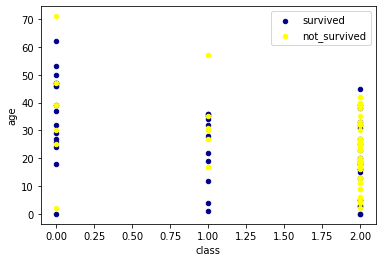

In [39]:
ax = df[df['survived'] == 1][:50].plot(kind='scatter', x='class', y='age', color='DarkBlue', label='survived');
df[df['survived'] == 0][:50].plot(kind='scatter', x='class', y='age', color='Yellow', label='not_survived', ax=ax);
plt.show()

In [21]:
feature_df = df[['gender','age','class','embarked']]
X=np.asarray(feature_df)
X[:5]

array([[ 1, 42,  2,  3],
       [ 1, 13,  2,  3],
       [ 1, 16,  2,  3],
       [ 0, 39,  2,  3],
       [ 0, 16,  2,  3]])

In [22]:

y=np.asarray(df['survived'])
y[:5]

array([0, 0, 0, 1, 1])

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1764, 4) (1764,)
Test set: (441, 4) (441,)


In [24]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)

SVC()

In [25]:
yhat = clf.predict(X_test)
yhat[:5]

array([0, 0, 0, 0, 0])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [27]:
clf.score(X_test, y_test)

0.6621315192743764

In [28]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,285,2,287
1,147,7,154
All,432,9,441


In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=3)

In [33]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       287
           1       0.78      0.05      0.09       154

    accuracy                           0.66       441
   macro avg       0.72      0.52      0.44       441
weighted avg       0.70      0.66      0.55       441



Confusion matrix, without normalization
[[285   2]
 [147   7]]


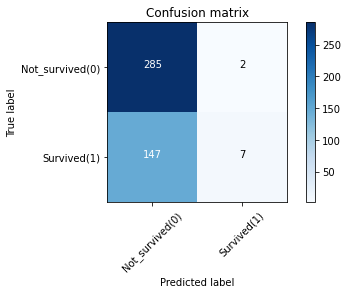

In [35]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not_survived(0)','Survived(1)'],normalize= False,  title='Confusion matrix')

In [36]:
k=clf.predict([[input(),input(),input(),input()]])
print(k)

1
50
3
4
[0]
